In [ ]:
# prompt: load in a csv file called "Walmart Dataset.csv" using pandas

import pandas as pd
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Walmart Dataset.csv')
print(data.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


# Lets look at the data!

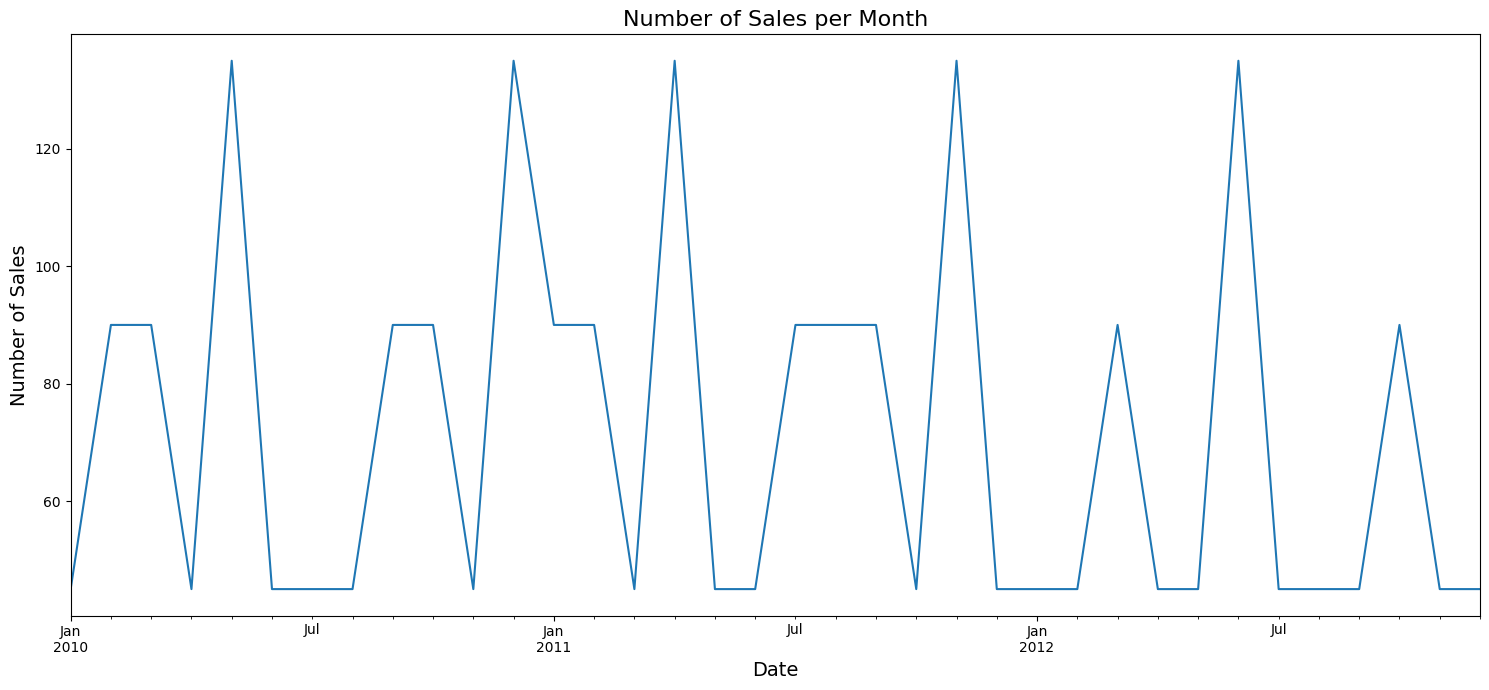

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Group by month and year to get the number of sales per month
monthly_sales = data.groupby(data['Date'].dt.to_period("M")).size()

# Plotting the trend over time
plt.figure(figsize=(15, 7))
monthly_sales.plot()
plt.title('Number of Sales per Month', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)
plt.tight_layout()
plt.show()

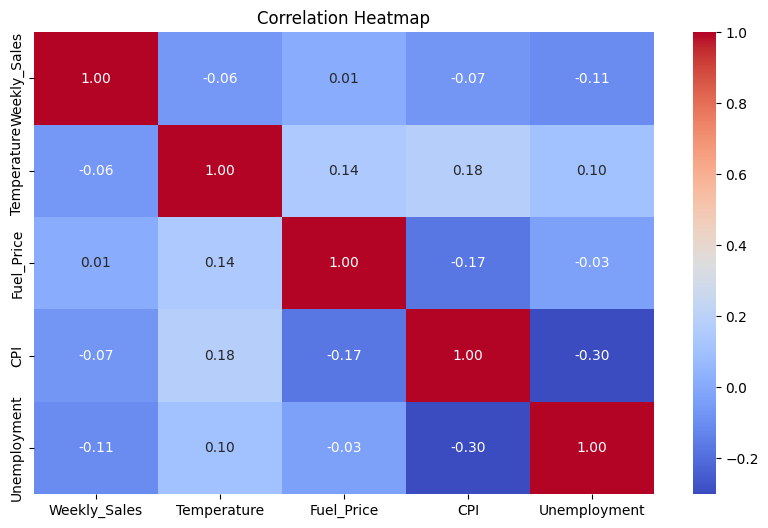

In [ ]:
# Find the strength of relationship between the variables
correlation_matrix = data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data.tail(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,NaT,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,NaT,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,NaT,760281.43,0,58.85,3.882,192.308899,8.667


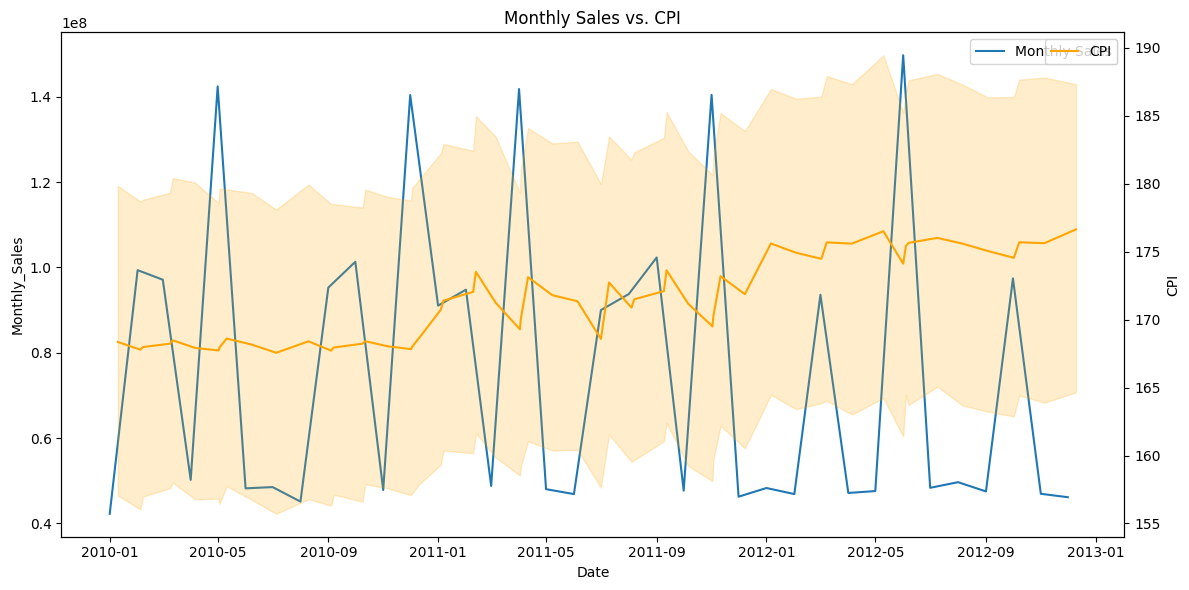

In [ ]:
# plot monthly sales vs CPI from the data
import pandas as pd
import matplotlib.pyplot as plt
# Convert 'Date' to datetime format (if not already done)
data['Date'] = pd.to_datetime(data['Date'])

# Group by month and year, calculate total monthly sales
monthly_data = data.groupby(data['Date'].dt.to_period('M'))['Weekly_Sales'].sum().reset_index()

# Rename columns for clarity
monthly_data.columns = ['Date', 'Monthly_Sales']

# Convert PeriodIndex to datetime objects for plotting
monthly_data['Date'] = monthly_data['Date'].dt.to_timestamp()

# Plot monthly sales against CPI
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Monthly_Sales', data=monthly_data, label='Monthly Sales')
ax2 = plt.twinx()
sns.lineplot(x='Date', y='CPI', data=data, ax=ax2, color='orange', label='CPI')

plt.title('Monthly Sales vs. CPI')
plt.xlabel('Date')
plt.ylabel('Monthly Sales')
ax2.set_ylabel('CPI')
plt.legend()
plt.tight_layout()
plt.show()


When CPI is high, spending is low.
each year has two peaks...

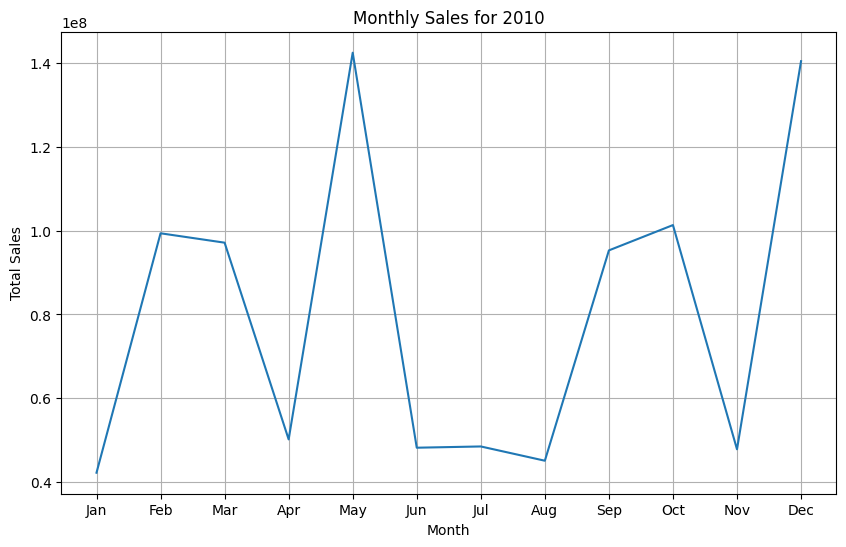

In [ ]:
# plot monthly sales for the year 2010 as a line graph

import matplotlib.pyplot as plt
# Filter data for the year 2010
data_2010 = data[data['Date'].dt.year == 2010]

# Group by month and calculate total monthly sales
monthly_sales_2010 = data_2010.groupby(data_2010['Date'].dt.month)['Weekly_Sales'].sum()

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_2010.index, monthly_sales_2010.values)

# Customize the plot
plt.title('Monthly Sales for 2010')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(monthly_sales_2010.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


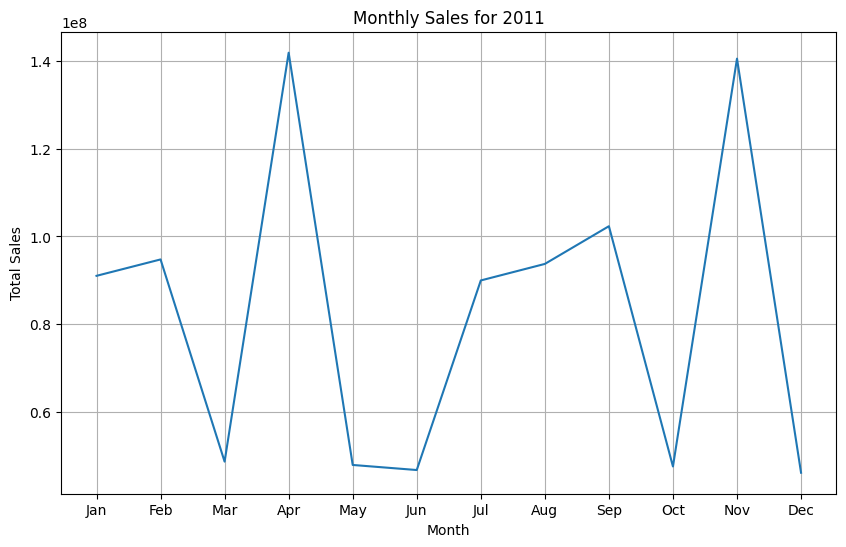

In [ ]:
# plot monthly sales for the year 2011 as a line graph

import matplotlib.pyplot as plt
# Filter data for the year 2011
data_2011 = data[data['Date'].dt.year == 2011]

# Group by month and calculate total monthly sales
monthly_sales_2011 = data_2011.groupby(data_2011['Date'].dt.month)['Weekly_Sales'].sum()

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_2011.index, monthly_sales_2011.values)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales for 2011')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Label the months
plt.grid(True)
plt.show()


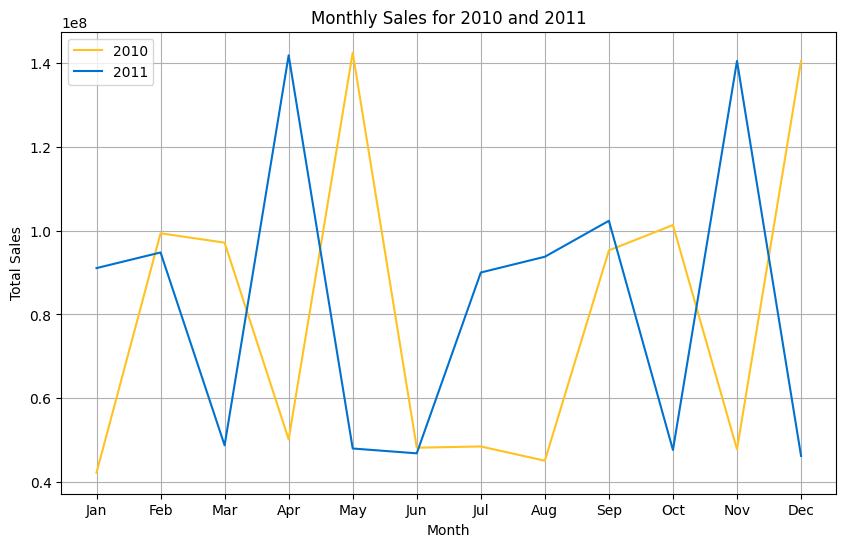

In [ ]:
# plot monthly sales in 2010 in gold. Plot monthly sales in 2011 on the same graph in blue

import matplotlib.pyplot as plt
# Filter data for the years 2010 and 2011
data_2010 = data[data['Date'].dt.year == 2010]
data_2011 = data[data['Date'].dt.year == 2011]

# Group by month and calculate total monthly sales for each year
monthly_sales_2010 = data_2010.groupby(data_2010['Date'].dt.month)['Weekly_Sales'].sum()
monthly_sales_2011 = data_2011.groupby(data_2011['Date'].dt.month)['Weekly_Sales'].sum()

# Create the line plot
plt.figure(figsize=(10, 6))

# Plot 2010 sales in gold
plt.plot(monthly_sales_2010.index, monthly_sales_2010.values, color='#ffc220', label='2010')

# Plot 2011 sales in blue
plt.plot(monthly_sales_2011.index, monthly_sales_2011.values, color='#0071ce', label='2011')

# Customize the plot
plt.title('Monthly Sales for 2010 and 2011')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend() # Show legend
plt.grid(True)
plt.show()


In [ ]:
# Find the total sales in 2010 and 2011

# Calculate total sales for 2010
total_sales_2010 = data_2010['Weekly_Sales'].sum()
print(f"Total sales in 2010: {total_sales_2010}")

# Calculate total sales for 2011
total_sales_2011 = data_2011['Weekly_Sales'].sum()
print(f"Total sales in 2011: {total_sales_2011}")


Total sales in 2010: 957867839.5300001
Total sales in 2011: 991658991.8


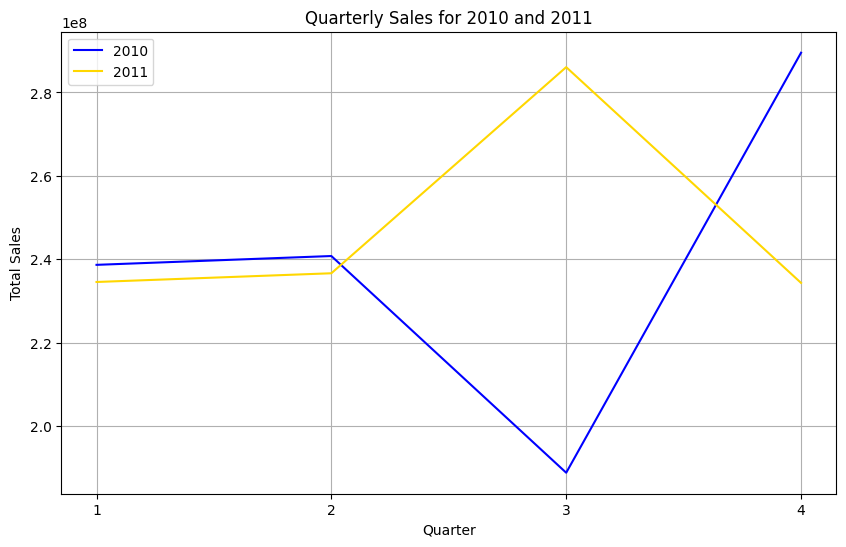

In [ ]:
# find the total sales per 3 months in 2010 and 2011. Use these values to plot a line graph of the sales in 2010 in blue, and the sales in 2011 in gold

import matplotlib.pyplot as plt

# Function to calculate quarterly sales
def calculate_quarterly_sales(data):
    quarterly_sales = []
    for i in range(0, 12, 3):  # Iterate through months in 3-month intervals
        quarter_data = data[(data['Date'].dt.month >= i + 1) & (data['Date'].dt.month <= i + 3)]
        quarterly_sales.append(quarter_data['Weekly_Sales'].sum())
    return quarterly_sales

# Calculate quarterly sales for 2010 and 2011
quarterly_sales_2010 = calculate_quarterly_sales(data_2010)
quarterly_sales_2011 = calculate_quarterly_sales(data_2011)

# Plotting the quarterly sales
plt.figure(figsize=(10, 6))

plt.plot(range(1, 5), quarterly_sales_2010, label='2010', color='blue')
plt.plot(range(1, 5), quarterly_sales_2011, label='2011', color='gold')


plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.title('Quarterly Sales for 2010 and 2011')
plt.xticks(range(1, 5))  # Set x-axis ticks to represent quarters
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# find the sum of sales when holiday_flag = 1

# Assuming 'data' DataFrame is already loaded and processed as in the provided code.

# Calculate the sum of sales when holiday_flag is 1
sum_sales_holiday = data[data['Holiday_Flag'] == 1]['Weekly_Sales'].sum()

print(f"The sum of sales when holiday_flag is 1: {sum_sales_holiday}")

sum_sales_not_holiday = data[data['Holiday_Flag'] == 0]['Weekly_Sales'].sum()
print(f"The sum of sales when holiday_flag is 0: {sum_sales_not_holiday}")


The sum of sales when holiday_flag is 1: 505299551.56
The sum of sales when holiday_flag is 0: 6231919435.55


In [ ]:
# count the number of rows where holiday flag is 0 and when holiday flag is 1

# Count the number of rows where holiday_flag is 1
holiday_rows = len(data[data['Holiday_Flag'] == 1])
print(f"Number of rows where holiday_flag is 1: {holiday_rows}")

# Count the number of rows where holiday_flag is 0
non_holiday_rows = len(data[data['Holiday_Flag'] == 0])
print(f"Number of rows where holiday_flag is 0: {non_holiday_rows}")


Number of rows where holiday_flag is 1: 450
Number of rows where holiday_flag is 0: 5985


In [47]:
#the average sales per day when it is a holiday vs. not

holiday = sum_sales_holiday/holiday_rows
not_holi = sum_sales_not_holiday/non_holiday_rows

print(f"Avg Sales per week when it is a holiday: {sum_sales_holiday/holiday_rows}")
print(f"Avg Sales per week when it is not a holiday: {sum_sales_not_holiday/non_holiday_rows}")
print(f'difference {holiday - not_holi}')


percentage_increase = ((holiday - not_holi) / not_holi) * 100
print(f'Percentage Increase: {percentage_increase:.2f}%')


Avg Sales per week when it is a holiday: 1122887.8923555557
Avg Sales per week when it is not a holiday: 1041256.3802088555
difference 81631.51214670017
Percentage Increase: 7.84%


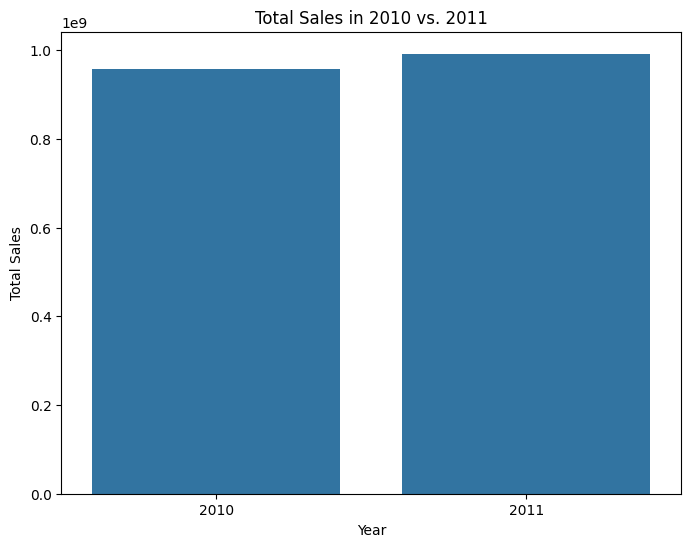

In [ ]:
# Use seaborn to create a visual that shows the sales in 2010 vs. the sales in 2011

import pandas as pd
import matplotlib.pyplot as plt
# Assuming data_2010 and data_2011 DataFrames are already defined as in the previous code.

# Calculate total sales for 2010 and 2011
total_sales_2010 = data_2010['Weekly_Sales'].sum()
total_sales_2011 = data_2011['Weekly_Sales'].sum()

# Create a DataFrame for the bar plot
sales_data = pd.DataFrame({
    'Year': [2010, 2011],
    'Total Sales': [total_sales_2010, total_sales_2011]
})

# Create the bar plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Year', y='Total Sales', data=sales_data)
plt.title('Total Sales in 2010 vs. 2011')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()


In [ ]:
#!pip install --upgrade pip setuptools wheel
#!pip install cmdstanpy
#!pip install prophet

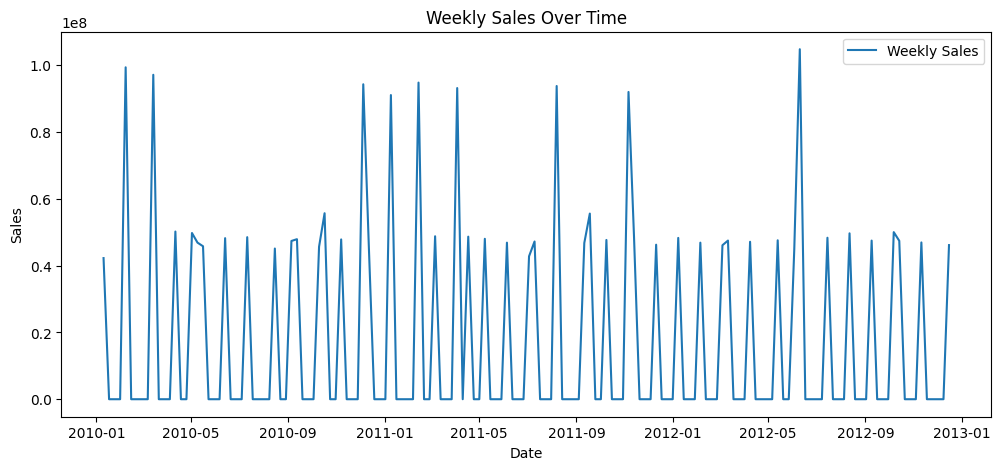

ADF Statistic: -3.0408174663675127
p-value: 0.031254417074502924
Stationary
ADF Statistic: -7.242102962100288
p-value: 1.8727097013463406e-10
Stationary


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


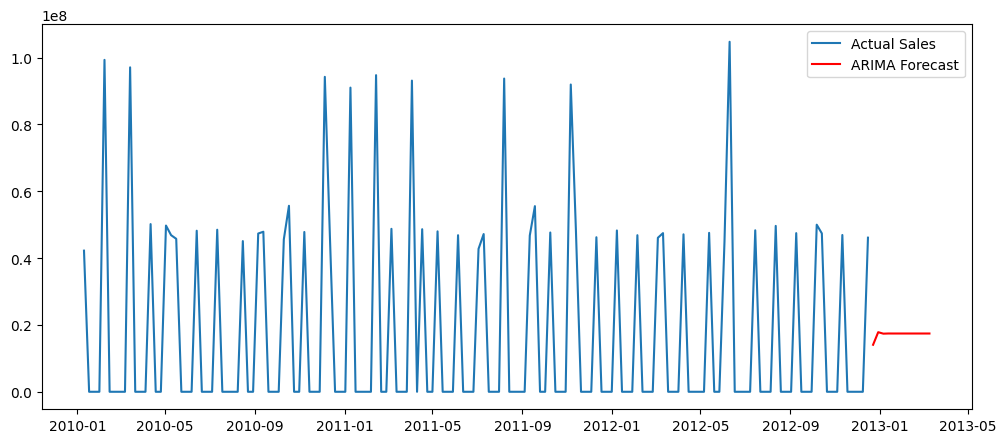

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

# Load the dataset
df = data.copy()
df.set_index('Date', inplace=True)

# Aggregate sales if needed (e.g., sum across stores)
df = df[['Weekly_Sales']].resample('W').sum()

# Plot the time series
plt.figure(figsize=(12, 5))
plt.plot(df, label="Weekly Sales")
plt.title("Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

### Step 3: Check Stationarity (ADF Test)
def adf_test(series):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Stationary' if result[1] < 0.05 else 'Non-Stationary')

adf_test(df['Weekly_Sales'])

# Differencing if needed (Make data stationary)
df['Sales_Diff'] = df['Weekly_Sales'].diff().dropna()
adf_test(df['Sales_Diff'].dropna())  # Check stationarity again

### Step 5: ARIMA Model
model = ARIMA(df['Weekly_Sales'], order=(1,1,1))  # (p,d,q) based on ACF/PACF analysis
arima_model = model.fit()
forecast_arima = arima_model.forecast(steps=12)  # Predict next 12 weeks

# Plot ARIMA Forecast
plt.figure(figsize=(12,5))
plt.plot(df.index, df['Weekly_Sales'], label="Actual Sales")
plt.plot(pd.date_range(start=df.index[-1], periods=13, freq='W')[1:], forecast_arima, label="ARIMA Forecast", color='red')
plt.legend()
plt.show()

### Step 6: Prophet Model
prophet_df = df.reset_index().rename(columns={'date': 'ds', 'weekly_sales': 'y'})

prophet_model = Prophet()
prophet_model.fit(prophet_df)

future = prophet_model.make_future_dataframe(periods=12, freq='W')
forecast = prophet_model.predict(future)

# Plot Prophet Forecast
prophet_model.plot(forecast)
plt.title("Sales Forecast Using Prophet")
plt.show()
